# ATSC 405 Day 31 Notebook
## Bryan Jansens

--------

## 1. Solve the Day 30 problem using odeint and plot the numerical and analytic solutions for comparison.

I choose values of $G$ and $SS$ consistent with those given in the Day 28 notes. The value of $w$ I choose was based on a bit of fiddling, to try and find something which gives a nice parabolic shape (too small a value of $w$ just looks like a downward-sloping arc, and too large a value is unphysical in most situations).

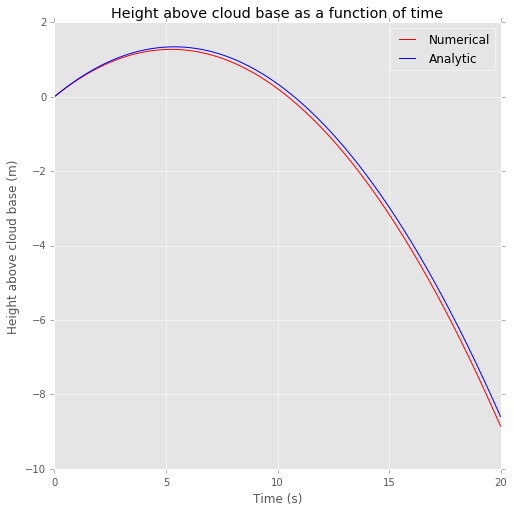

In [1]:
from scipy.integrate import odeint
%matplotlib inline
plt.style.use('ggplot')
plt.close('all')

def find_derivs(yvals, times, params):
    rad, height = yvals
    G, supersat, wvel = params
    derivs = [(G*supersat)/rad, wvel - (1.28e8*rad**2)]
    return derivs

G = ((2.36e-5)*7.7)/1000    # m^2 s^-1
supersat = 0.002            # dimensionless
wvel = 0.5                  # m s^-1

rad0 = 10e-6     # initial droplet radius (m)
height0 = 0.0    # initial height above cloud base (m)

params = [G, supersat, wvel]
yvals0 = [rad0, height0]
t_final = 20.0
t_step = 0.01
times = np.arange(0.0, t_final, t_step)

result = odeint(find_derivs, yvals0, times, args = (params,))

analytic = (wvel*times) - (1.28e8)*G*supersat*(times**2)

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(times, result[:,1], 'r-', label = 'Numerical')
ax.plot(times, analytic, 'b-', label = 'Analytic')
out = ax.set(xlabel = "Time (s)", ylabel = "Height above cloud base (m)", 
             title = "Height above cloud base as a function of time")
out = ax.legend()

## 2. If a raindrop has a radius of 1 mm at cloud base, which is located 5 km above the ground, what will be its radius at the ground and how long will it take to reach the ground if the relative humidity between cloud base and ground is constant at 60%?

Compared to the above problem, I change the value of $G$ to $7\times10^{-7} \ \mathrm{m^2 \ s}$ (using $r$ in meters), and an initial radius of $10^{-3} \ \mathrm{m}$. I also adjust the vertical scale to be relative to the ground instead of cloud base, so that the height integration begins at $h_0=5000 \ \mathrm{m}$.

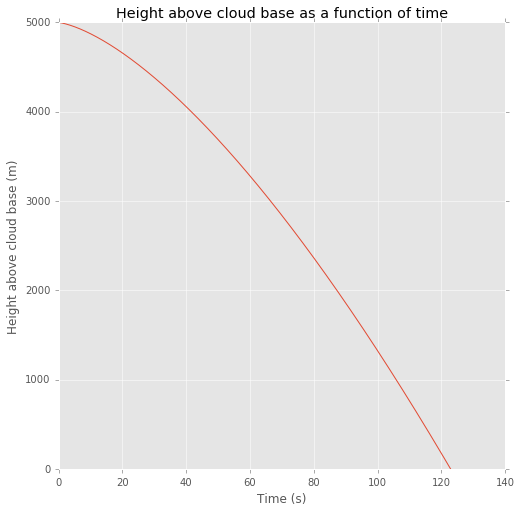

In [56]:
plt.close('all')

def find_derivs2(yvals, times, params):
    rad, height = yvals
    G, supersat, wvel = params
    derivs = [(G*supersat)/rad, wvel - (6000*rad)]
    return derivs

G = 7e-7                    # m^2 s^-1
supersat = 0.6              # dimensionless
wvel = 0.5                  # m s^-1

rad0 = 1e-3        # initial droplet radius (m)
height0 = 5000.0    # initial height above ground (m)

params = [G, supersat, wvel]
yvals0 = [rad0, height0]
t_final = 122.88
t_step = 0.01
times = np.arange(0.0, t_final, t_step)

result = odeint(find_derivs2, yvals0, times, args = (params,))

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(times, result[:,1])
out = ax.set(xlabel = "Time (s)", ylabel = "Height above cloud base (m)", 
             title = "Height above cloud base as a function of time")

In [57]:
print(result[:,1])

[  5.00000000e+03   4.99994487e+03   4.99988950e+03 ...,   1.58641332e+00
   9.78947950e-01   3.71457889e-01]


It takes about 122.88 seconds for the drop to reach the ground.

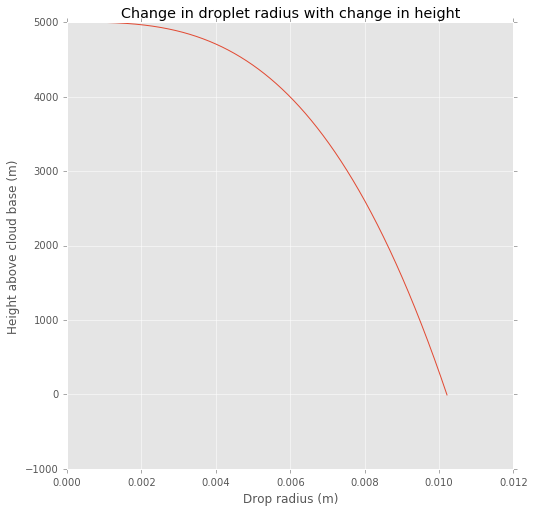

In [44]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(result[:,0], result[:,1])
out = ax.set(xlabel = "Drop radius (m)", ylabel = "Height above cloud base (m)", 
             title = "Change in droplet radius with change in height")

In [58]:
print(result[:,0])

[ 0.001       0.00100419  0.00100837 ...,  0.01020755  0.01020796
  0.01020837]


The radius of the droplet at the ground is about 0.01 meters or 1 cm.